# Modules, colors, and functions

Remove scroll from figures

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Extend the size of the Window

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Load Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import convolution as conv
import sunpy.cm as cm
import sunpy.map
import sunpy.physics.differential_rotation as dr
import scipy as sp
from scipy import sparse, signal, stats
from pprint import pprint
import glob
from scipy.interpolate import griddata
%matplotlib inline

### Remove Warnings and Define Color Defaults

You can switch colormaps between *hmimag* (*seismic*) if you want to focus on the *weak* (*strong*) magnetic features.

In [4]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# Color Axis limits
vmin = -2000
vmax = 2000

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [(0.00, 0.00, 0.00),
      (0.31, 0.24, 0.00),
      (0.43, 0.16, 0.49),
      (0.32, 0.70, 0.30),
      (0.45, 0.70, 0.90),
      (1.00, 0.82, 0.67)]

# Colormap Definition
current_cmap = plt.cm.get_cmap('hmimag')
# current_cmap = plt.cm.get_cmap('seismic')
current_cmap.set_bad(color='black')

# Instrument Coverage and Characteristics

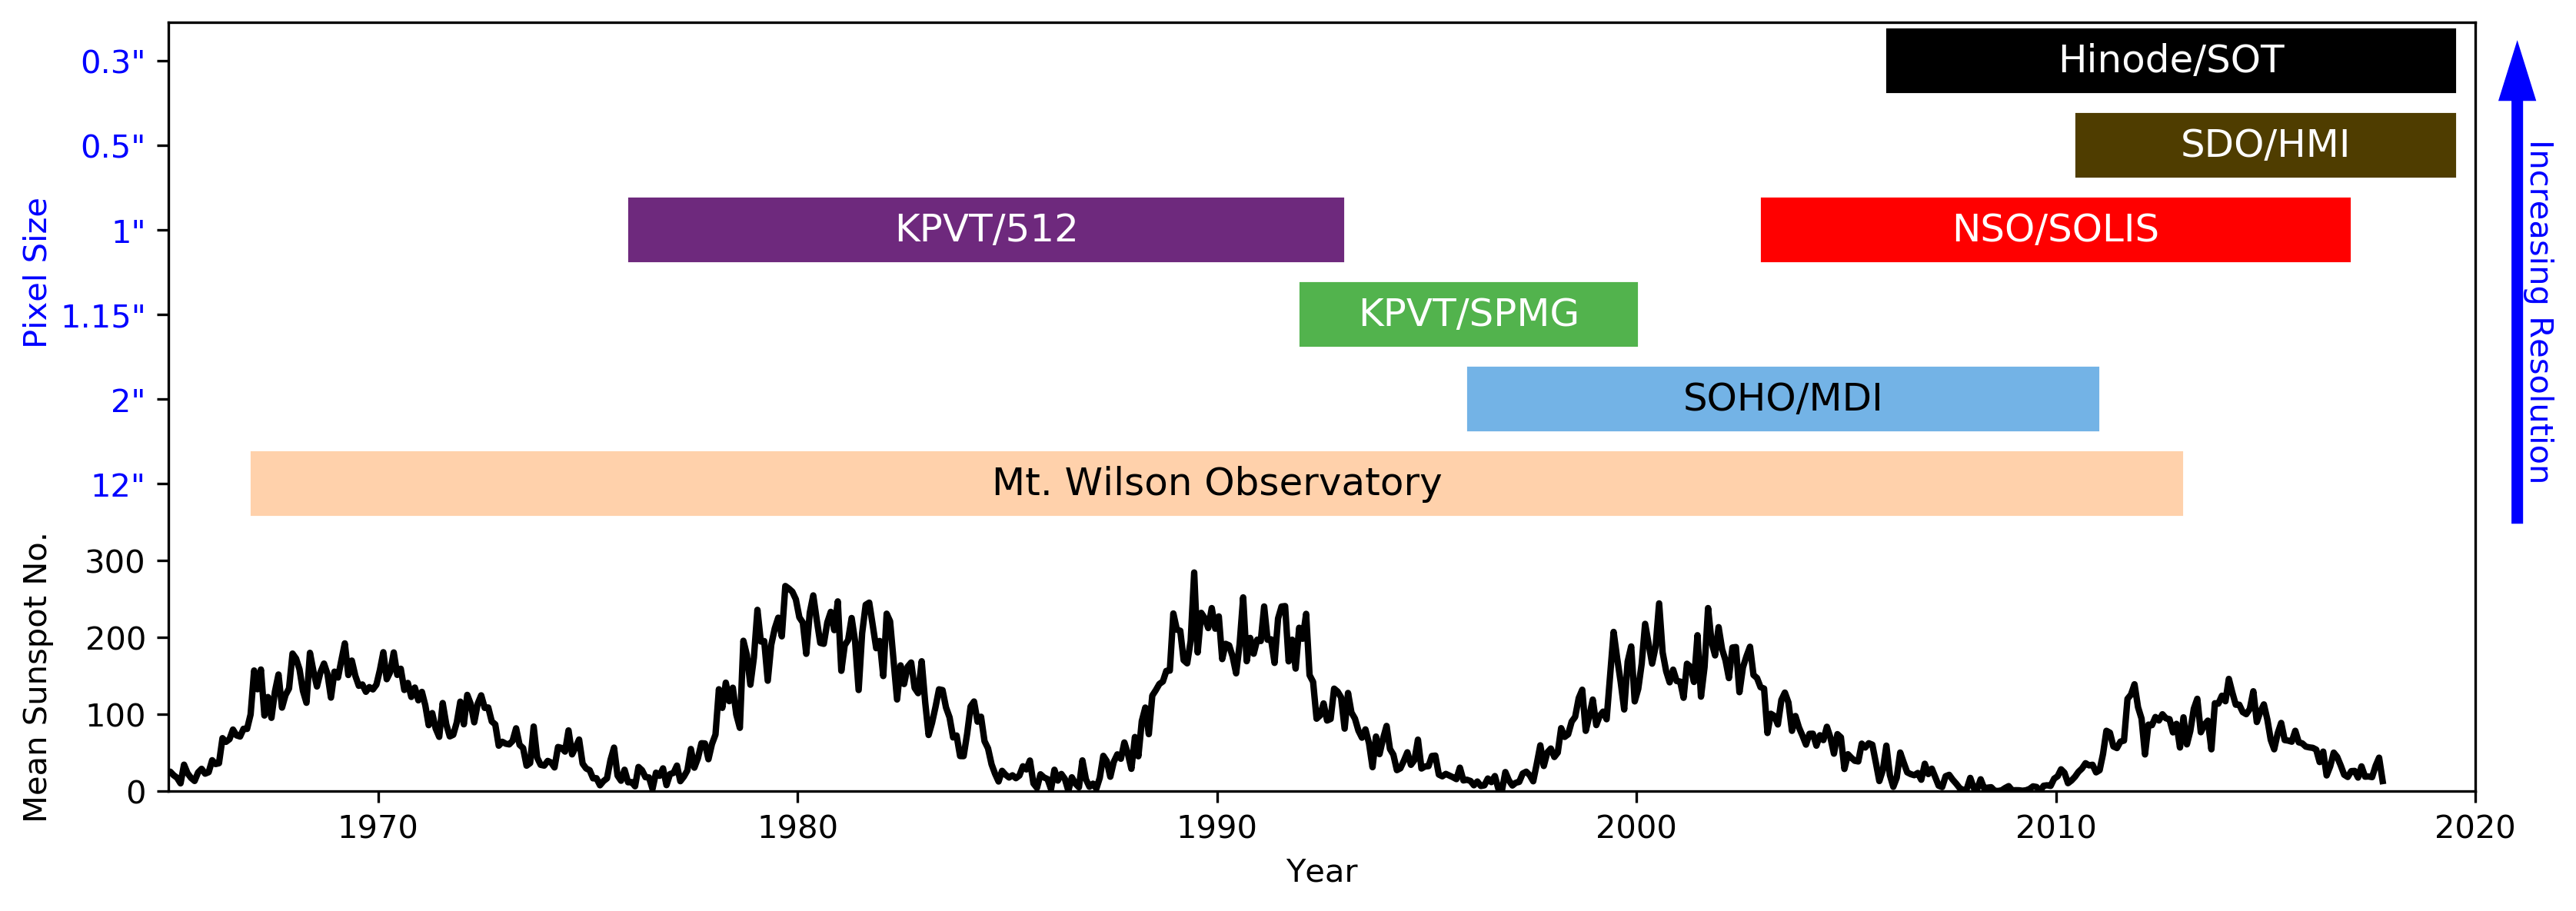

In [5]:
SILSO_Sn = pd.read_csv('Data/SSN/SN_m_tot_V2.0.csv', quotechar = '"', header = 0)

# Size definitions
dpi = 300
pxx = 3000   # Horizontal size of each panel
pxy = 1000    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 1      # Number of vertical panels

# Padding
padv  = 50 #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 50 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)


# Average group number 
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
ax1.plot(SILSO_Sn['FRACYEAR'], SILSO_Sn['MMEAN'], color = Clr[0], linewidth = 2)

# Defining bar properties
Bw = 80  # bar width
Bg = 110 # Gap between bars
ClB = 400 # Location of center of lowest bar
ftz = 12

# Mount Wislon Observatory
x1 = 1967
x2 = 2013
y1 = ClB-Bw/2
y2 = ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[5])
ax1.text((x1+x2)/2, (y1+y2)/2, 'Mt. Wilson Observatory', color = 'k', horizontalalignment='center', verticalalignment='center', fontsize = ftz)

# SOHO/MDI
x1 = 1996
x2 = 2011
y1 = Bg+ClB-Bw/2
y2 = Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[4])
ax1.text((x1+x2)/2, (y1+y2)/2, 'SOHO/MDI', color = 'k', horizontalalignment='center', verticalalignment='center', fontsize = ftz)

# KPVT/SPMG
x1 = 1992
x2 = 2000
y1 = 2*Bg+ClB-Bw/2
y2 = 2*Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[3])
ax1.text((x1+x2)/2, (y1+y2)/2, 'KPVT/SPMG', color = 'w', horizontalalignment='center', verticalalignment='center', fontsize = ftz)

# KPVT/512
x1 = 1976
x2 = 1993
y1 = 3*Bg+ClB-Bw/2
y2 = 3*Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[2])
ax1.text((x1+x2)/2, (y1+y2)/2, 'KPVT/512', color = 'w', horizontalalignment='center', verticalalignment='center', fontsize = ftz)


# NSO/SOLIS
x1 = 2003
x2 = 2017
y1 = 3*Bg+ClB-Bw/2
y2 = 3*Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = 'r')
ax1.text((x1+x2)/2, (y1+y2)/2, 'NSO/SOLIS', color = 'w', horizontalalignment='center', verticalalignment='center', fontsize = ftz)


# SDO/HMI
x1 = 2010.5
x2 = 2019.5
y1 = 4*Bg+ClB-Bw/2
y2 = 4*Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[1])
ax1.text((x1+x2)/2, (y1+y2)/2, 'SDO/HMI', color = 'w', horizontalalignment='center', verticalalignment='center', fontsize = ftz)

# Hinode/SOT
x1 = 2006
x2 = 2019.5
y1 = 5*Bg+ClB-Bw/2
y2 = 5*Bg+ClB+Bw/2
x = np.array([x1, x1, x2, x2])
y = np.array([y1, y2, y2, y1])
ax1.fill(x,y, color = Clr[0])
ax1.text((x1+x2)/2, (y1+y2)/2, 'Hinode/SOT', color = 'w', horizontalalignment='center', verticalalignment='center', fontsize = ftz)

# Annotation
ax1.arrow(2021, 350, 0, 550, clip_on = False, head_width = 0.8, head_length = 70, width = 0.2, color = 'b')
ax1.text(2021.5, 625,'Increasing Resolution',horizontalalignment='center', verticalalignment='center', rotation = -90, color = 'b')

# Axes properties
ax1.set_xlabel('Year')
ax1.text(1961.9, 150,'Mean Sunspot No.',horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
ax1.text(1961.9, 2.5*Bg+ClB,'Pixel Size',horizontalalignment='center', verticalalignment='center', rotation = 'vertical', color = 'b')
ax1.set_yticks([0, 100, 200, 300, ClB, Bg+ClB, 2*Bg+ClB, 3*Bg+ClB, 4*Bg+ClB, 5*Bg+ClB])
ax1.set_yticklabels(['0', '100', '200', '300', '12"', '2"', '1.15"', '1"', '0.5"', '0.3"'])

# Changing tick Color
for i in range(4,10):
    ax1.get_yticklabels()[i].set_color('b')

ax1.set_xlim(left = 1965, right = 2020)
ax1.set_ylim(bottom = 0, top = 1000);

Each of the historical instruments has a different resolution, spectral response, noise level, and cadence.  **The goal of the challenge is to use deep learning to combine all these instruments into a single super-instrument with homogenous characteristics**.

This figure shows the temporal coverage of 6 historical surveys (in order of increasing resolution from top to bottom):

* **Mt. Wilson Observatory** (1967-2013): 
    * Ground-based
    * Resolution = 4" (512x512 pixels)
    * Cadence = 1 image/day
    * Full-Disk
    
    
* **SOHO/MDI** (1996-2011): 
    * Space-based
    * Resolution = 2" (1024x1024 pixels)
    * Cadence = 1 image/96 Minutes
    * Full-Disk.
    
    
* **KPVT/SPMG** (1992-2000)
    * Ground-based
    * Resolution = 1.15" (1788x1788 pixels)
    * Cadence = 1 image/day
    * Full-Disk.
    
    
* **KPVT/512** (1976-1993): 
    * Ground-based
    * Resolution = 1" (2048x2048 pixels)
    * Cadence = 1 image/day
    * Full-Disk.
    
    
* **NSO/SOLIS** (2003-2017): 
    * Ground-based - Two magnetographs using different lines
    * Resolution = 1" (2048x2048 pixels)
    * Cadence = 1 image/day
    * Full-Disk.
    

* **SDO/HMI** (2010-Present): 
    * Space-based
    * Resolution = 0.5" (4096x4096 pixels)
    * Cadence = 1 image/12 minutes
    * Full-Disk.
    

* **Hinode/SOT** (2006-Present): 
    * Space-based
    * Resolution = 0.3" (1019x512 - limited field of view)
    * Cadence = Intermitent campaigns.
    * Limited field of view
    
    
# Sample Magnetograms - Modern Era

## Read Mt. Wilson Observatory

In [6]:
# Read File
MWFfile = 'Data/MW/m110331_1781_0na1.fits'

MWF_fits = fits.open(MWFfile, cache=False)
MWF_fits.verify('fix')
dataMWF = MWF_fits[0].data

# Adding missing header information
headerMW = MWF_fits[0].header
headerMW['CUNIT1'] = 'arcsec'
headerMW['CUNIT2'] = 'arcsec'
headerMW['CDELT1'] = headerMW['DXB_IMG']
headerMW['CDELT2'] = headerMW['DYB_IMG']
headerMW['CRVAL1'] = 0.0
headerMW['CRVAL2'] = 0.0
headerMW['RSUN_OBS'] = (headerMW['R0'])*headerMW['DXB_IMG']
headerMW['CROTA2'] = 0.0
headerMW['CRPIX1'] = headerMW['X0']
headerMW['CRPIX2'] = headerMW['Y0']
headerMW['T_OBS']   = '2011.03.31_18:00:00_TAI'
headerMW['DATE-OBS']   = '2011.03.31_18:00:00_TAI'
headerMW['DATE_OBS']   = '2011.03.31_18:00:00_TAI'
headerMW['RSUN_REF']= 696000000
headerMW['CTYPE1']  = 'HPLN-TAN'                                                            
headerMW['CTYPE2']  = 'HPLT-TAN'

# Assemble Sunpy map
MWFmap = sunpy.map.Map(MWF_fits[0].data, headerMW)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in MWFmap.dimensions]) * u.pixel
hpc_coords = MWFmap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / MWFmap.rsun_obs
MWFmap.data[r>1] = np.nan

## Read SDO/HMI

In [7]:
# Read File
HMIfile = 'Data/HMI/hmi.M_720s.20110401_000000_TAI.1.magnetogram.fits'

HMI_fits = fits.open(HMIfile, cache=False)
HMI_fits.verify('fix')
dataHMI = HMI_fits[1].data

# Assemble Sunpy map
HMImap = sunpy.map.Map(HMI_fits[1].data, HMI_fits[1].header)

# Fix instrument rotation
HMImap = HMImap.rotate(rmatrix=HMImap.rotation_matrix, missing=np.nan, recenter=True)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in HMImap.dimensions]) * u.pixel
hpc_coords = HMImap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / HMImap.rsun_obs
HMImap.data[r>1] = np.nan

# Crop Field of view to match MW
HMImap = HMImap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

## Read SOHO/MDI

In [8]:
# Read File
MDIfile = 'Data/MDI/mdi.fd_M_96m_lev182.20110401_000000_TAI.data.fits'

MDI_fits = fits.open(MDIfile, cache=False)
dataMDI = MDI_fits[1].data

# Assemble Sunpy map
MDImap = sunpy.map.Map(MDI_fits[1].data, MDI_fits[1].header)

# Fix instrument rotation
MDImap = MDImap.rotate(rmatrix=MDImap.rotation_matrix, missing=np.nan, recenter=True)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in MDImap.dimensions]) * u.pixel
hpc_coords = MDImap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / MDImap.rsun_obs
MDImap.data[r>1] = np.nan

# Crop Field of view to match MW
MDImap = MDImap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

## Read Hinode/SOT

In [9]:
# Read File
SOTfile = 'Data/SOT/20110401_002004.fits'

SOT_fits = fits.open(SOTfile, cache=False)
dataSOT = SOT_fits[1].data

# Calculate Line-of-Sight Magnetic Field
dataSOT = np.cos(SOT_fits[2].data*np.pi/180)*SOT_fits[1].data

# Adding missing header information
headerH = SOT_fits[0].header
headerH['cunit1'] = 'arcsec'
headerH['cunit2'] = 'arcsec'
headerH['CDELT1'] = headerH['XSCALE']
headerH['CDELT2'] = headerH['YSCALE']
headerH['CRVAL1'] = headerH['XCEN']
headerH['CRVAL2'] = headerH['YCEN']
headerH['RSUN_OBS'] = headerH['SOLAR_RA']
headerH['CROTA2'] = headerH['B_ANGLE']
headerH['CRPIX1'] = dataSOT.shape[1]/2
headerH['CRPIX2'] = dataSOT.shape[0]/2
headerH['RSUN_REF'] = 696000000
headerH['DATE-OBS'] = headerH['TEND']

# Assemble Sunpy map
SOTmap = sunpy.map.Map(dataSOT, headerH)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in SOTmap.dimensions]) * u.pixel
hpc_coords = SOTmap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / SOTmap.rsun_obs
SOTmap.data[r>1] = np.nan

## Read NSO/SOLIS

In [10]:
# Read File
SOLISfile = 'Data/SOLIS/k4v93110331t175930_FDISK_Reduced.fits'

SOLIS_fits = fits.open(SOLISfile, cache=False)
SOLIS_fits.verify('fix')
dataSOLIS = SOLIS_fits[0].data

headerS = SOLIS_fits[0].header
headerS['CUNIT1'] = 'arcsec'
headerS['CUNIT2'] = 'arcsec'
headerS['CDELT1'] = np.abs(headerS['CDELT1'])
headerS['RSUN_REF']= 696000000
headerS['RSUN_OBS'] = headerS['EPH_R0']
headerS['CTYPE1']  = 'HPLN-TAN'                                                            
headerS['CTYPE2']  = 'HPLT-TAN'

# Assemble Sunpy map
SOLISmap = sunpy.map.Map(dataSOLIS, headerS)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in SOLISmap.dimensions]) * u.pixel
hpc_coords = SOLISmap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / SOLISmap.rsun_obs
SOLISmap.data[r>1] = np.nan

# # Crop Field of view to match MW
# SOLISmap = SOLISmap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

## Use Differential Rotation to Equalize MWO's Positions to SOT

In [11]:
## Apply differential rotation
x, y = np.meshgrid(*[np.arange(v.value) for v in MWFmap.dimensions]) * u.pixel
hpc_coords = MWFmap.pixel_to_world(x, y)
newcoords = dr.solar_rotate_coordinate(hpc_coords, time = SOTmap.date)

# Flatten
x2 = newcoords.Tx.flatten()
y2 = newcoords.Ty.flatten()
x1 = hpc_coords.Tx.flatten()
y1 = hpc_coords.Ty.flatten()
old_mg = MWFmap.data.flatten()
dim1 = MWFmap.dimensions

# Make sure it only operates on finite pixels
ind = (np.isfinite(x1) * np.isfinite(y1) * np.isfinite(x2) * np.isfinite(y2) * np.isfinite(old_mg))

# Interpolate into new  position
interp_data = griddata((x2[ind], y2[ind]), old_mg[ind], (x1[ind], y1[ind]), method='cubic')
new_mg = np.full((int(dim1[0].value), int(dim1[1].value)), np.nan)
new_mg.ravel()[ind] = interp_data

# Create map
headerMW['DATE-OBS'] = headerH['TEND']
headerMW['DATE_OBS'] = headerH['TEND']

# Assemble Sunpy map
MWFmap = sunpy.map.Map(new_mg, headerMW)

## Use Differential Rotation to Equalize SOLIS' Positions to SOT

In [12]:
## Apply differential rotation
x, y = np.meshgrid(*[np.arange(v.value) for v in SOLISmap.dimensions]) * u.pixel
hpc_coords = SOLISmap.pixel_to_world(x, y)
newcoords = dr.solar_rotate_coordinate(hpc_coords, time = SOTmap.date)

# Flatten
x2 = newcoords.Tx.flatten()
y2 = newcoords.Ty.flatten()
x1 = hpc_coords.Tx.flatten()
y1 = hpc_coords.Ty.flatten()
old_mg = SOLISmap.data.flatten()
dim1 = SOLISmap.dimensions

# Make sure it only operates on finite pixels
ind = (np.isfinite(x1) * np.isfinite(y1) * np.isfinite(x2) * np.isfinite(y2) * np.isfinite(old_mg))

# Interpolate into new  position
interp_data = griddata((x2[ind], y2[ind]), old_mg[ind], (x1[ind], y1[ind]), method='cubic')
new_mg = np.full((int(dim1[0].value), int(dim1[1].value)), np.nan)
new_mg.ravel()[ind] = interp_data

# Create map
headerS['DATE-OBS'] = headerH['TEND']
headerS['DATE_OBS'] = headerH['TEND']

# Assemble Sunpy map
SOLISmap = sunpy.map.Map(new_mg, headerS)

# Crop Field of view to match MW
SOLISmap = SOLISmap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

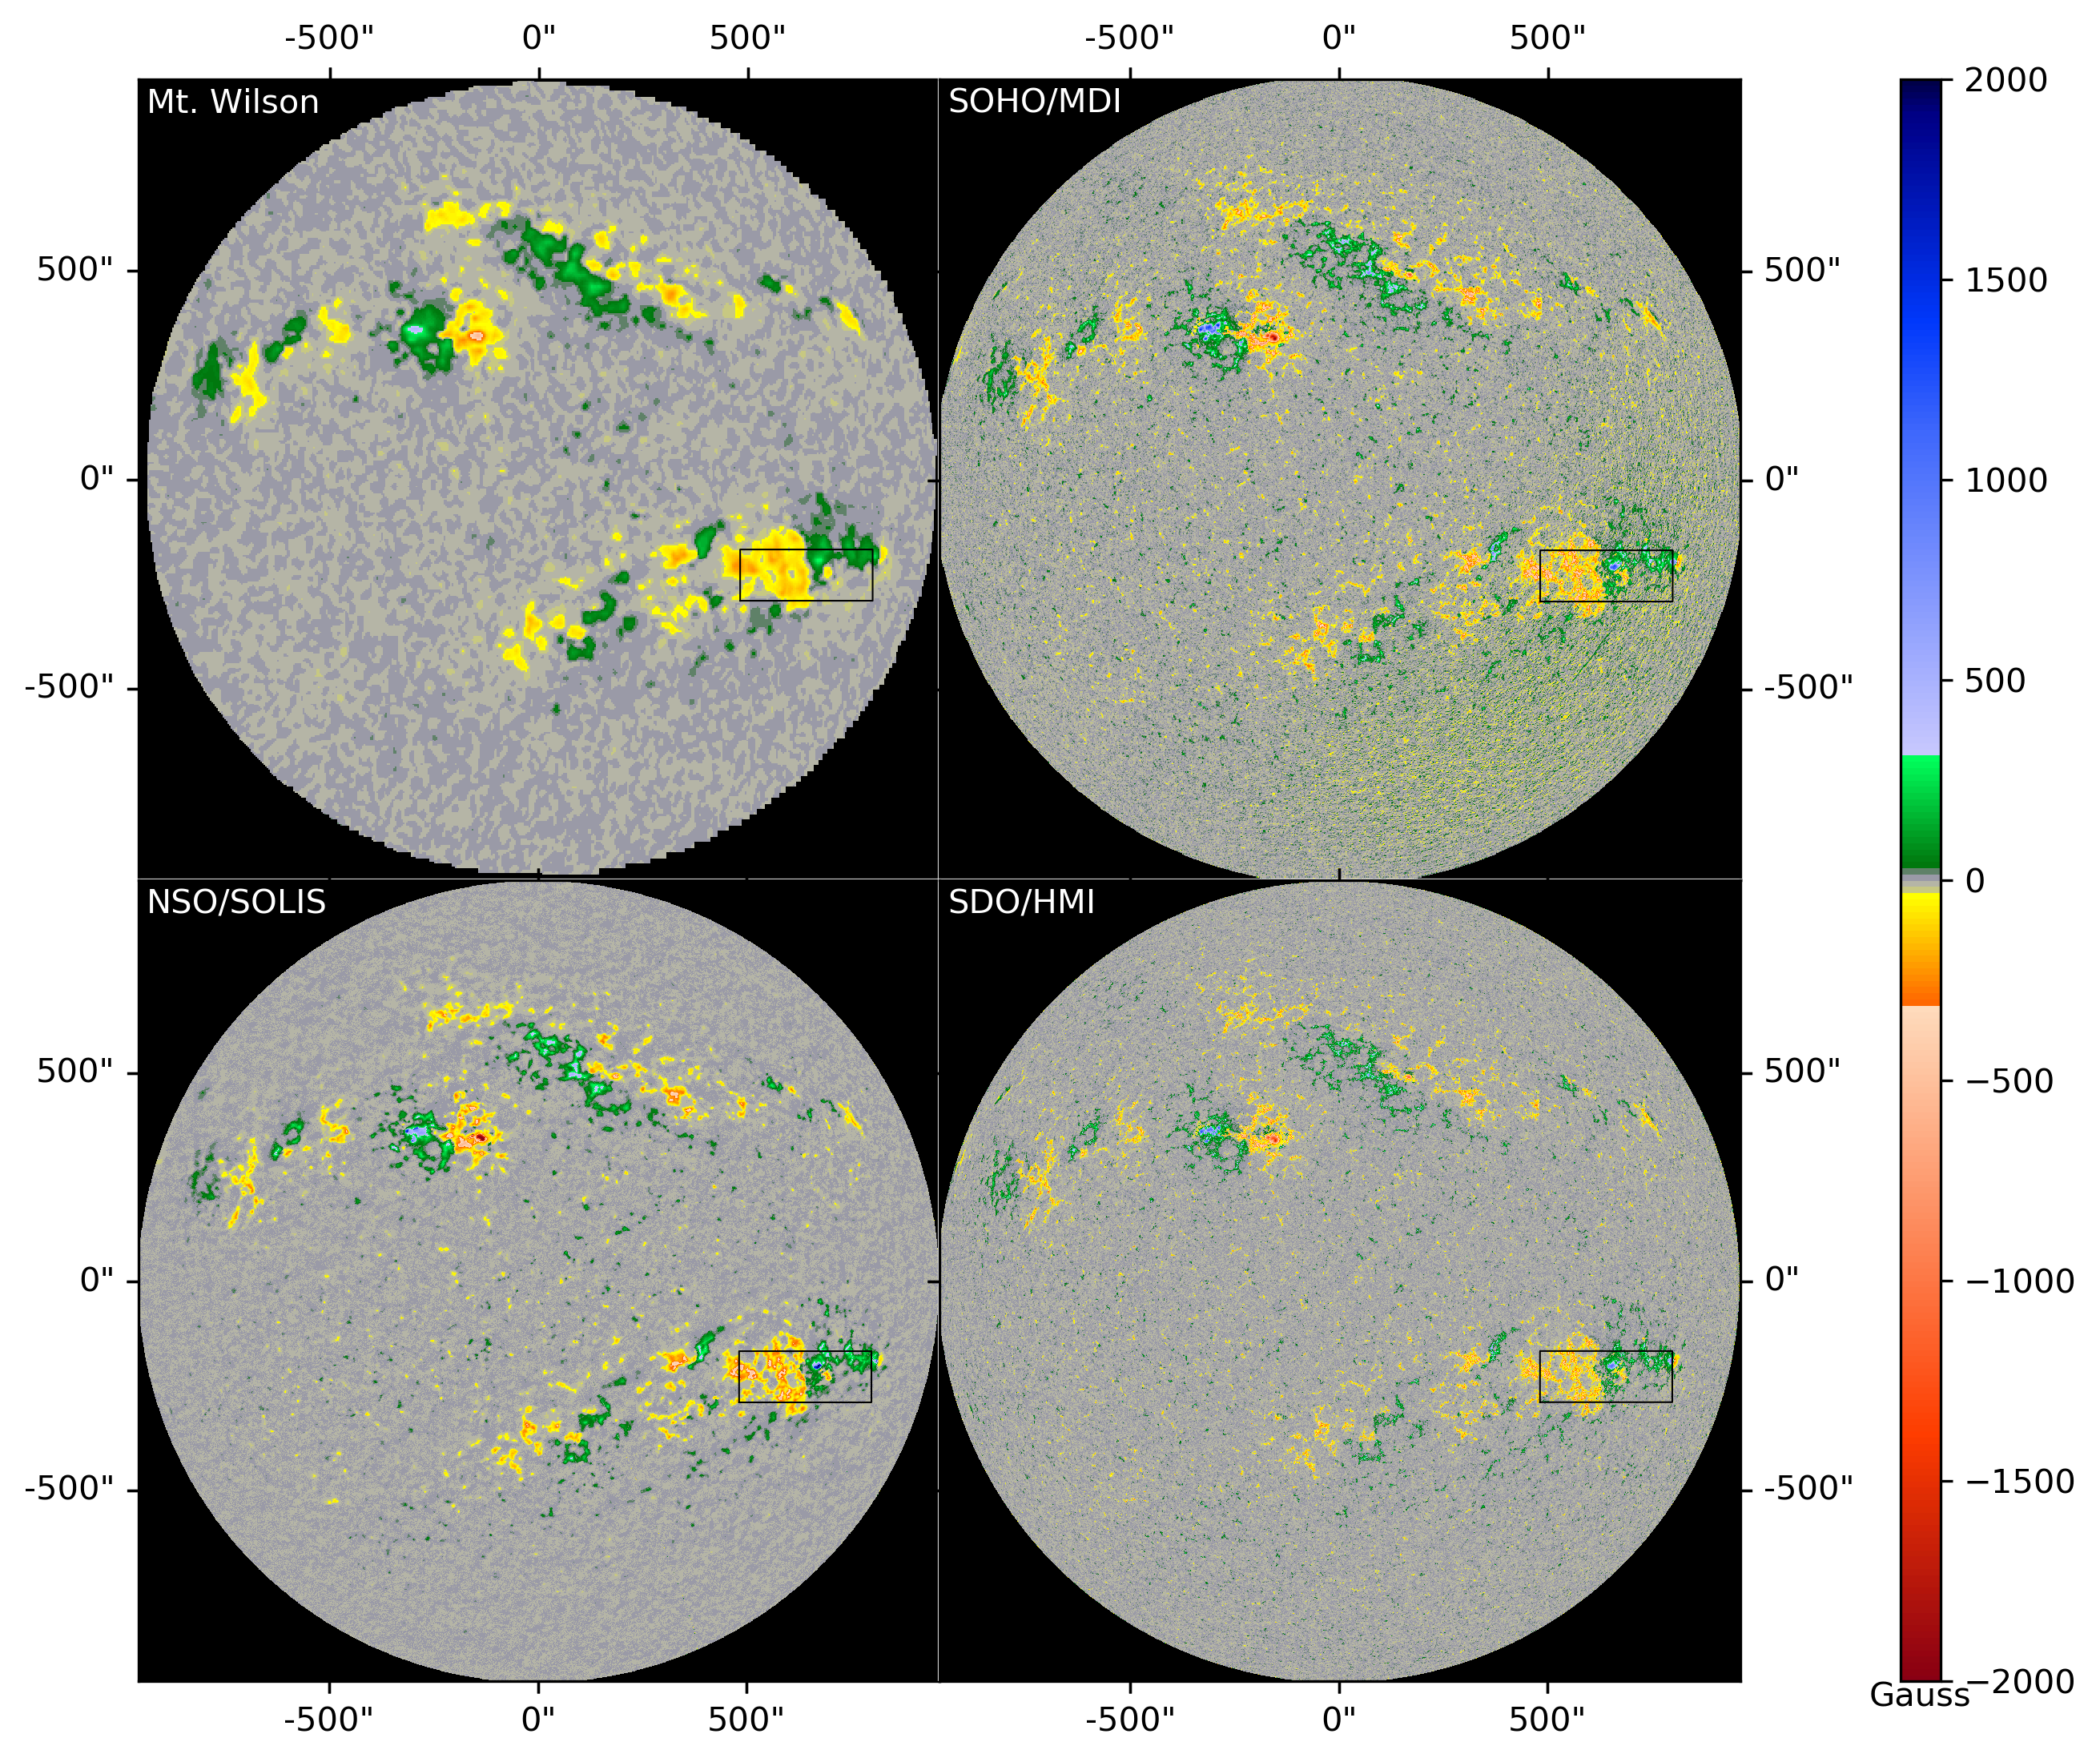

In [13]:
# Size definitions
dpi = 300
pxx = 1000   # Horizontal size of each panel
pxy = pxx   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 2     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)


## Add Mt. Wilson magnetogram
ax4 = fig.add_axes([ppadh, ppadv+ppxy, ppxx, ppxy], projection=MWFmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MWFmap.dimensions]) * u.pixel
hpc_coords = MWFmap.pixel_to_world(x, y)
ax4.pcolormesh(x, y, MWFmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax4.grid(False)

# Plot SOT field of view
xSOT = [SOTmap.bottom_left_coord.Tx, SOTmap.bottom_left_coord.Tx, SOTmap.top_right_coord.Tx, SOTmap.top_right_coord.Tx, SOTmap.bottom_left_coord.Tx]
ySOT = [SOTmap.bottom_left_coord.Ty, SOTmap.top_right_coord.Ty, SOTmap.top_right_coord.Ty, SOTmap.bottom_left_coord.Ty, SOTmap.bottom_left_coord.Ty]
coord = SkyCoord(xSOT, ySOT, frame=MWFmap.coordinate_frame)
ax4.plot_coord(coord,'k',linewidth = 0.5)

ax4.text(0.01, 0.99, 'Mt. Wilson', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax4.transAxes)

lon = ax4.coords[0]
lon.set_ticklabel_position('t')


## Add MDI magnetogram
ax1 = fig.add_axes([ppadh+ppxx, ppadv+ppxy, ppxx, ppxy], projection=MDImap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MDImap.dimensions]) * u.pixel
hpc_coords = MDImap.pixel_to_world(x, y)
ax1.pcolormesh(x, y, MDImap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax1.grid(False)

# Plot SOT field of view
xSOT = [SOTmap.bottom_left_coord.Tx, SOTmap.bottom_left_coord.Tx, SOTmap.top_right_coord.Tx, SOTmap.top_right_coord.Tx, SOTmap.bottom_left_coord.Tx]
ySOT = [SOTmap.bottom_left_coord.Ty, SOTmap.top_right_coord.Ty, SOTmap.top_right_coord.Ty, SOTmap.bottom_left_coord.Ty, SOTmap.bottom_left_coord.Ty]
coord = SkyCoord(xSOT, ySOT, frame=MDImap.coordinate_frame)
ax1.plot_coord(coord,'k',linewidth = 0.5)

ax1.text(0.01, 0.99, 'SOHO/MDI', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax1.transAxes)

lon = ax1.coords[0]
lon.set_ticklabel_position('t')

lat = ax1.coords[1]
lat.set_ticklabel_position('r')


## Add SOLIS magnetogram
ax2 = fig.add_axes([ppadh, ppadv, ppxx, ppxy], projection=SOLISmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in SOLISmap.dimensions]) * u.pixel
hpc_coords = SOLISmap.pixel_to_world(x, y)
mesh = ax2.pcolormesh(x, y, SOLISmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)

# Plot SOT field of view
coord = SkyCoord(xSOT, ySOT, frame=SOLISmap.coordinate_frame)
ax2.plot_coord(coord,'k',linewidth = 0.5)
ax2.grid(False)

ax2.text(0.01, 0.99, 'NSO/SOLIS', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax2.transAxes)


## Add HMI magnetogram
ax3 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy], projection=HMImap)

x, y = np.meshgrid(*[np.arange(v.value) for v in HMImap.dimensions]) * u.pixel
hpc_coords = HMImap.pixel_to_world(x, y)
mesh = ax3.pcolormesh(x, y, HMImap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)

# Plot SOT field of view
coord = SkyCoord(xSOT, ySOT, frame=HMImap.coordinate_frame)
ax3.plot_coord(coord,'k',linewidth = 0.5)
ax3.grid(False)

ax3.text(0.01, 0.99, 'SDO/HMI', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax3.transAxes)

lat = ax3.coords[1]
lat.set_ticklabel_position('r')


## Add colorbar
axcb = fig.add_axes([ppadh+4*ppadh2+2*ppxx, ppadv, ppadh2, 2*ppxy])
cmap = current_cmap
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(axcb, cmap=cmap,
                                norm=norm)

axcb.text(0.5, 0, 'Gauss', horizontalalignment='center', verticalalignment='top', color = 'k', transform=axcb.transAxes);


SOHO/MDI *(left)* and SDO/HMI *(right)* magnetograms.   The field of view of Hinode/SOT is shown as a thin black box.

# Zoom into Hinode/SOT Field of View

In [14]:
# Create maps with cropped field of view
MDISmap = MDImap.submap(SOTmap.bottom_left_coord,SOTmap.top_right_coord)
HMISmap = HMImap.submap(SOTmap.bottom_left_coord,SOTmap.top_right_coord)
SOLISSmap = SOLISmap.submap(SOTmap.bottom_left_coord,SOTmap.top_right_coord)
MWFSmap = MWFmap.submap(SOTmap.bottom_left_coord,SOTmap.top_right_coord)

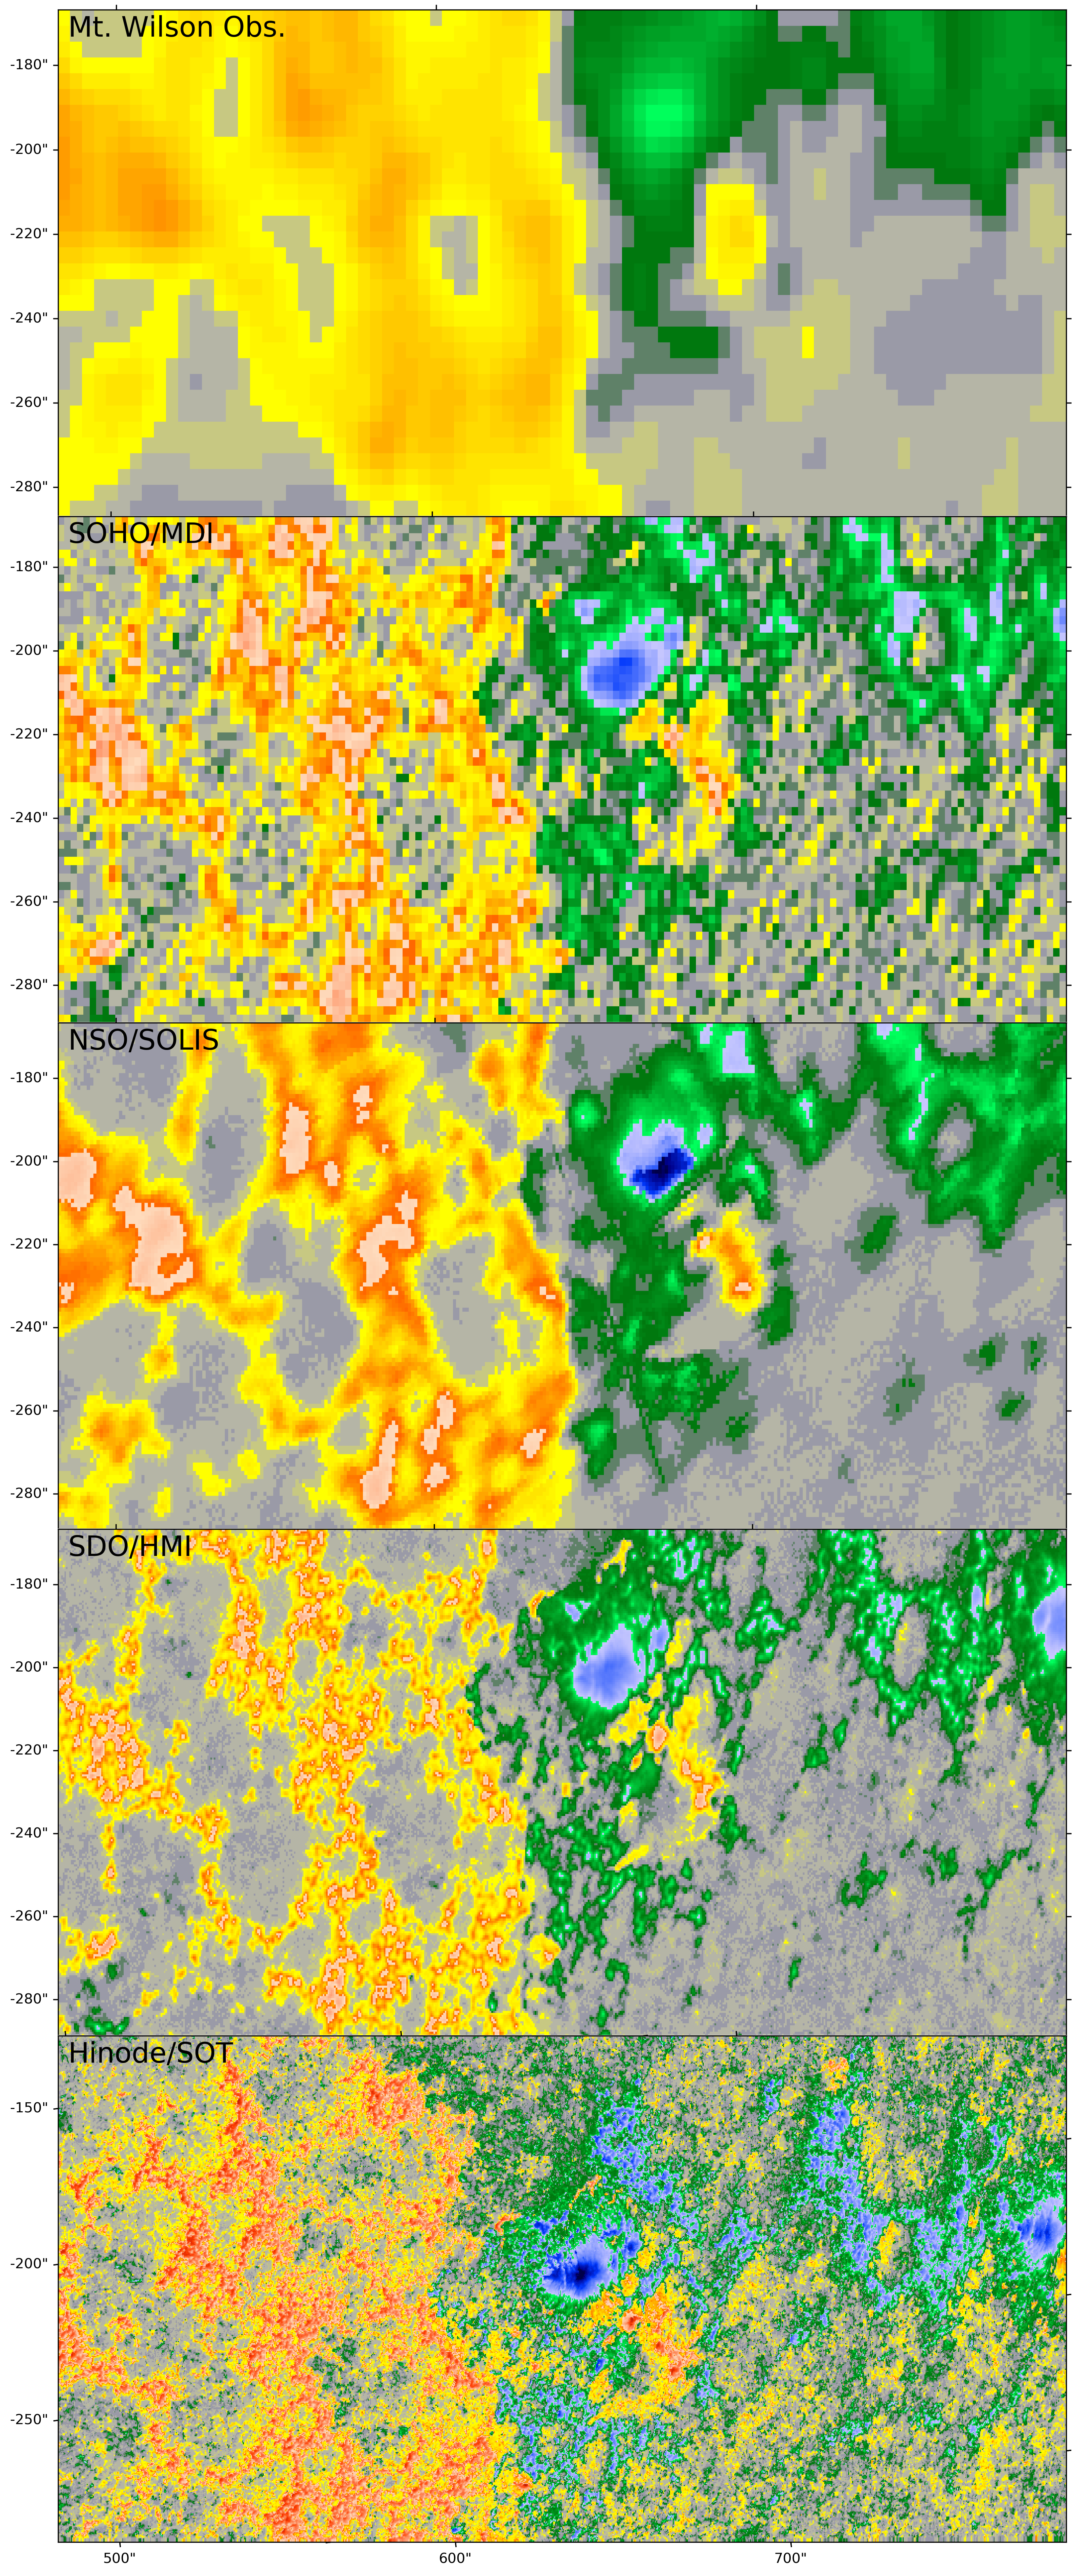

In [15]:
# Size definitions
dpi = 300
pxx = 3000   # Horizontal size of each panel
pxy = pxx*SOTmap.data.shape[0]/SOTmap.data.shape[1]   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 3     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)


## Add MDI magnetogram
ax5 = fig.add_axes([ppadh, ppadv+4*ppxy, ppxx, ppxy], projection=MWFSmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MWFSmap.dimensions]) * u.pixel
hpc_coords = MWFSmap.pixel_to_world(x, y)
ax5.pcolormesh(x, y, MWFSmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax5.grid(False)

ax5.text(0.01, 0.99, 'Mt. Wilson Obs.', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax5.transAxes, fontsize = 20)



## Add MDI magnetogram
ax1 = fig.add_axes([ppadh, ppadv+3*ppxy, ppxx, ppxy], projection=MDISmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MDISmap.dimensions]) * u.pixel
hpc_coords = MDISmap.pixel_to_world(x, y)
ax1.pcolormesh(x, y, MDISmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax1.grid(False)

ax1.text(0.01, 0.99, 'SOHO/MDI', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax1.transAxes, fontsize = 20)


## Add SOLIS magnetogram
ax4 = fig.add_axes([ppadh, ppadv+2*ppxy, ppxx, ppxy], projection=SOLISSmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in SOLISSmap.dimensions]) * u.pixel
hpc_coords = SOLISSmap.pixel_to_world(x, y)
ax4.pcolormesh(x, y, SOLISSmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax4.grid(False)

ax4.text(0.01, 0.99, 'NSO/SOLIS', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax4.transAxes, fontsize = 20)


## Add HMI magnetogram
ax2 = fig.add_axes([ppadh, ppadv+ppxy, ppxx, ppxy], projection=HMISmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in HMISmap.dimensions]) * u.pixel
hpc_coords = HMISmap.pixel_to_world(x, y)
mesh = ax2.pcolormesh(x, y, HMISmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax2.grid(False)

ax2.text(0.01, 0.99, 'SDO/HMI', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax2.transAxes, fontsize = 20)


## Add SOT magnetogram
ax3 = fig.add_axes([ppadh, ppadv, ppxx, ppxy], projection=SOTmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in SOTmap.dimensions]) * u.pixel
hpc_coords = SOTmap.pixel_to_world(x, y)
mesh = ax3.pcolormesh(x, y, SOTmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax3.grid(False)

ax3.text(0.01, 0.99, 'Hinode/SOT', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax3.transAxes, fontsize = 20);

Cut out using Hinode/SOT's field of view.  This field of view is shown in the previous image as a black rectangle.



# Sample Magnetograms - Historic Era

## Read Mt. Wilson Observatory

In [16]:
# Read File
MWFfile = 'Data/MW/m991211_1896_0na1.fits'

MWF_fits = fits.open(MWFfile, cache=False)
MWF_fits.verify('fix')
dataMWF = MWF_fits[0].data

# Adding missing header information
header = MWF_fits[0].header
header['CUNIT1'] = 'arcsec'
header['CUNIT2'] = 'arcsec'
header['CDELT1'] = header['DXB_IMG']
header['CDELT2'] = header['DYB_IMG']
header['CRVAL1'] = 0.0
header['CRVAL2'] = 0.0
header['RSUN_OBS'] = (header['R0'])*header['DXB_IMG']
header['CROTA2'] = 0.0
header['CRPIX1'] = header['X0']
header['CRPIX2'] = header['Y0']
header['T_OBS']   = '1999.12.11_12:00:00_TAI'
header['DATE-OBS']   = '1999.12.11_12:00:00_TAI'
header['DATE_OBS']   = '1999.12.11_12:00:00_TAI'
header['RSUN_REF']= 696000000
header['CTYPE1']  = 'HPLN-TAN'                                                            
header['CTYPE2']  = 'HPLT-TAN'

# Assemble Sunpy map
MWFmap = sunpy.map.Map(MWF_fits[0].data, header)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in MWFmap.dimensions]) * u.pixel
hpc_coords = MWFmap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / MWFmap.rsun_obs
MWFmap.data[r>1] = np.nan

## Read SOHO/MDI

In [17]:
# Read File
MDIfile = 'Data/MDI/mdi.fd_M_96m_lev182.19991211_173600_TAI.data.fits'

MDI_fits = fits.open(MDIfile, cache=False)
MDI_fits.verify('fix')
dataMDI = MDI_fits[1].data

# Assemble Sunpy map
MDImap = sunpy.map.Map(MDI_fits[1].data, MDI_fits[1].header)

# Fix instrument rotation
MDImap = MDImap.rotate(rmatrix=MDImap.rotation_matrix, missing=np.nan, recenter=True)

# Apply NaNs for Pixels outside the Sun
x, y = np.meshgrid(*[np.arange(v.value) for v in MDImap.dimensions]) * u.pixel
hpc_coords = MDImap.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / MDImap.rsun_obs
MDImap.data[r>1] = np.nan

# Crop Field of view to match MWO
MDImap = MDImap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

## Read KPVT/SPMG

In [18]:
SPMGfile = 'Data/SPMG/spmg_eo000_C1_19991211_1740.fits'

SPMG_fits = fits.open(SPMGfile, cache=False)
SPMG_fits.verify('fix')
dataSPMG = SPMG_fits[0].data[5,:,:]

# Adding missing header information
header = SPMG_fits[0].header
header['cunit1'] = 'arcsec'
header['cunit2'] = 'arcsec'
header['CDELT1'] = header['CDELT1A']
header['CDELT2'] = header['CDELT2A']
header['CRVAL1'] = 0
header['CRVAL2'] = 0
header['RSUN_OBS'] = header['EPH_R0 ']
header['CROTA2'] = 0
header['CRPIX1'] = header['CRPIX1A']
header['CRPIX2'] = header['CRPIX2A']
header['PC2_1'] = 0
header['PC1_2'] = 0
header['RSUN_REF']= 696000000

# Assemble Sunpy map
SPMGmap = sunpy.map.Map(dataSPMG, SPMG_fits[0].header)

# Apply NaNs for Pixels outside the Sun
SPMGmap = SPMGmap.submap(MWFmap.bottom_left_coord,MWFmap.top_right_coord)

## Specify arbitrary region for zoom-in

In [19]:
bottom_left_coord = SkyCoord(200*u.arcsec, 0*u.arcsec, frame=MWFmap.coordinate_frame)
top_right_coord = SkyCoord(750*u.arcsec, 300*u.arcsec, frame=MWFmap.coordinate_frame)

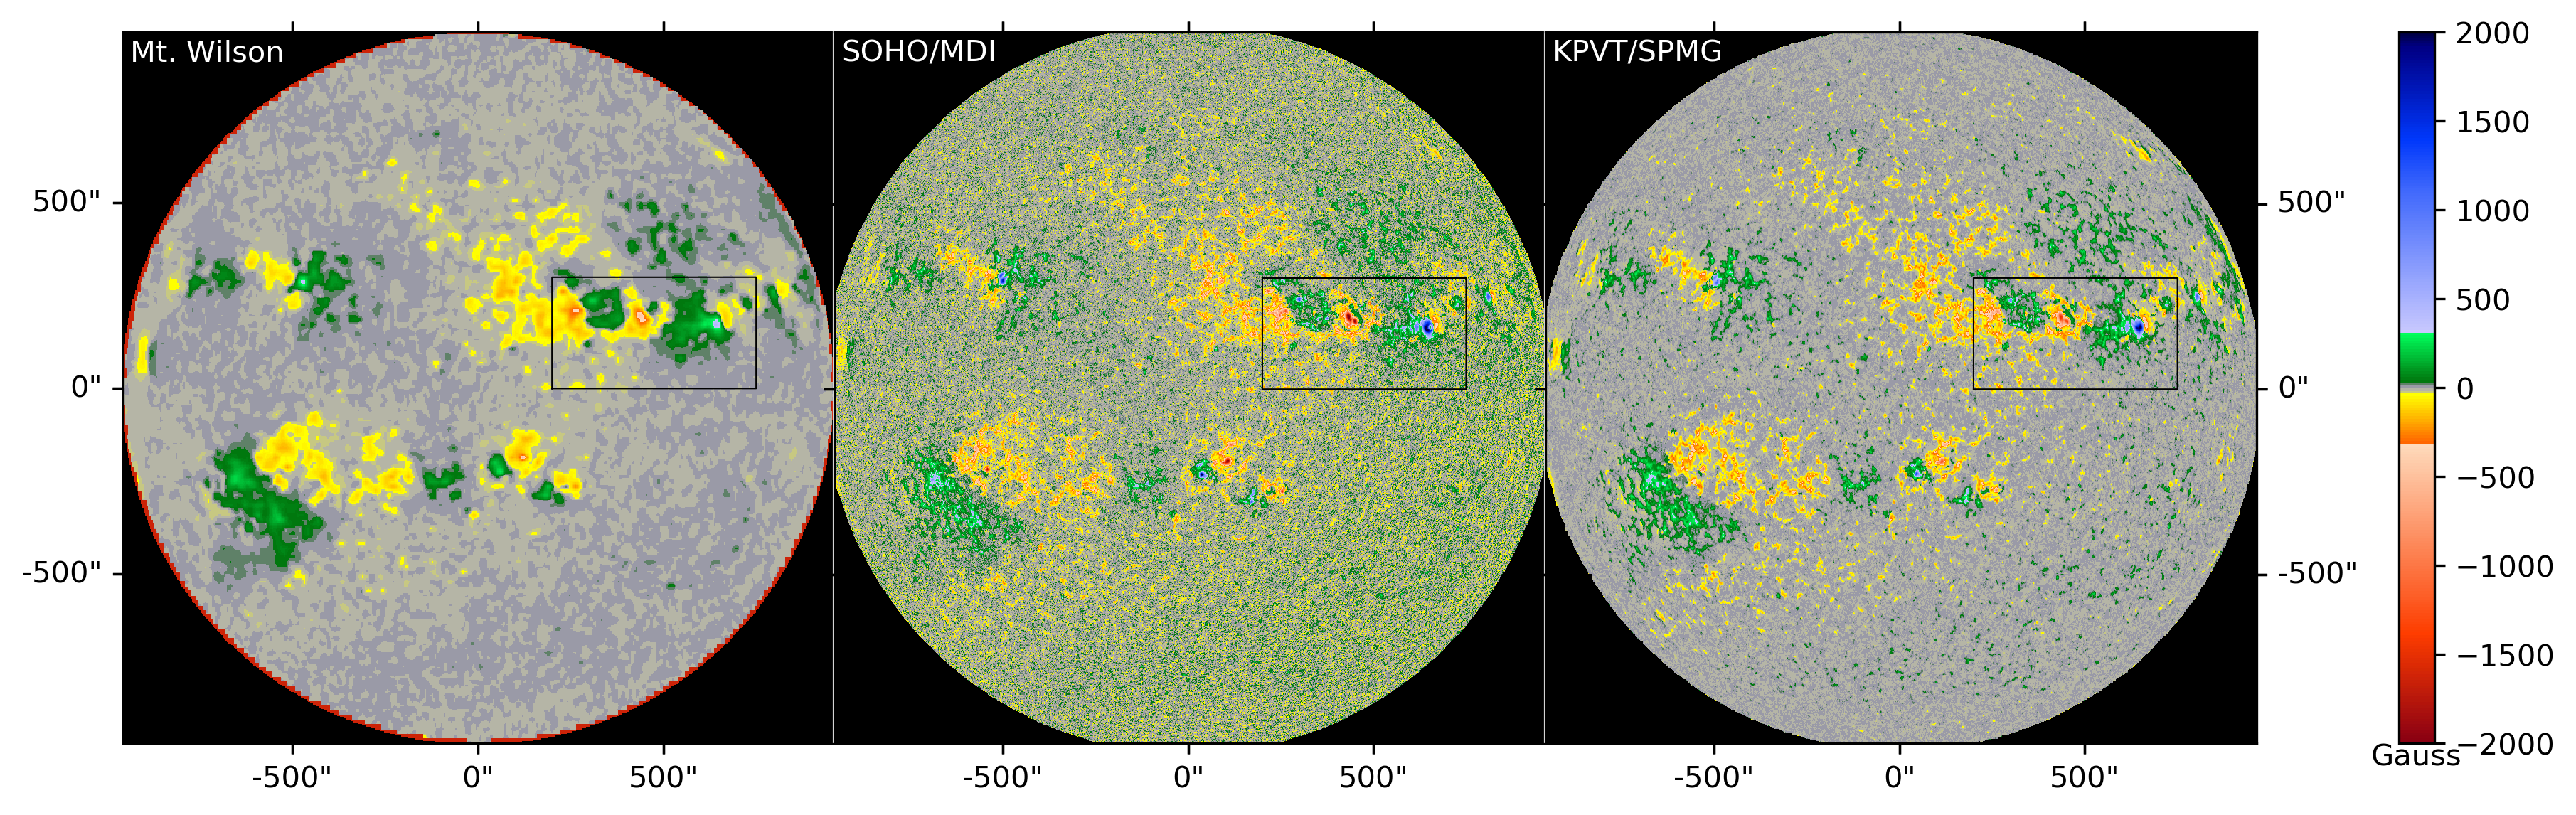

In [20]:
# Size definitions
dpi = 300
pxx = 1000   # Horizontal size of each panel
pxy = pxx   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)


## Add Mt. Wilson magnetogram
ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy], projection=MWFmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MWFmap.dimensions]) * u.pixel
hpc_coords = MWFmap.pixel_to_world(x, y)
ax1.pcolormesh(x, y, MWFmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax1.grid(False)

# Plot Zoom-in field of view
xZOOM = [bottom_left_coord.Tx, bottom_left_coord.Tx, top_right_coord.Tx, top_right_coord.Tx, bottom_left_coord.Tx]
yZOOM = [bottom_left_coord.Ty, top_right_coord.Ty, top_right_coord.Ty, bottom_left_coord.Ty, bottom_left_coord.Ty]
coord = SkyCoord(xZOOM, yZOOM, frame=SPMGmap.coordinate_frame, unit = u.arcsec)

ax1.plot_coord(coord,'k',linewidth = 0.5)

ax1.text(0.01, 0.99, 'Mt. Wilson', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax1.transAxes)


## Add MDI magnetogram
ax3 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy], projection=MDImap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MDImap.dimensions]) * u.pixel
hpc_coords = MDImap.pixel_to_world(x, y)
ax3.pcolormesh(x, y, MDImap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax3.grid(False)

# Plot Zoom-in field of view
coord = SkyCoord(xZOOM, yZOOM, frame=MDImap.coordinate_frame)
ax3.plot_coord(coord,'k',linewidth = 0.5)


ax3.text(0.01, 0.99, 'SOHO/MDI', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax3.transAxes)

lat = ax3.coords[1]
lat.set_ticklabel_position('r')


## Add SPMG magnetogram
ax2 = fig.add_axes([ppadh+2*ppxx, ppadv, ppxx, ppxy], projection=SPMGmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in SPMGmap.dimensions]) * u.pixel
hpc_coords = SPMGmap.pixel_to_world(x, y)
ax2.pcolormesh(x, y, SPMGmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax2.grid(False)

# Plot Zoom-in field of view
coord = SkyCoord(xZOOM, yZOOM, frame=SPMGmap.coordinate_frame)
ax2.plot_coord(coord,'k',linewidth = 0.5)


ax2.text(0.01, 0.99, 'KPVT/SPMG', horizontalalignment='left', verticalalignment='top', color = 'w', transform=ax2.transAxes)

lat = ax2.coords[1]
lat.set_ticklabel_position('r')


## Add colorbar
axcb = fig.add_axes([ppadh+4*ppadh2+3*ppxx, ppadv, ppadh2, ppxy])
cmap = current_cmap
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(axcb, cmap=cmap,
                                norm=norm)

axcb.text(0.5, 0, 'Gauss', horizontalalignment='center', verticalalignment='top', color = 'k', transform=axcb.transAxes);


# Zoom Into Arbitrary Field of View

In [21]:
# Create maps with cropped field of view
MWFSmap = MWFmap.submap(bottom_left_coord,top_right_coord)
MDISmap = MDImap.submap(bottom_left_coord,top_right_coord)
SPMGSmap = SPMGmap.submap(bottom_left_coord,top_right_coord)

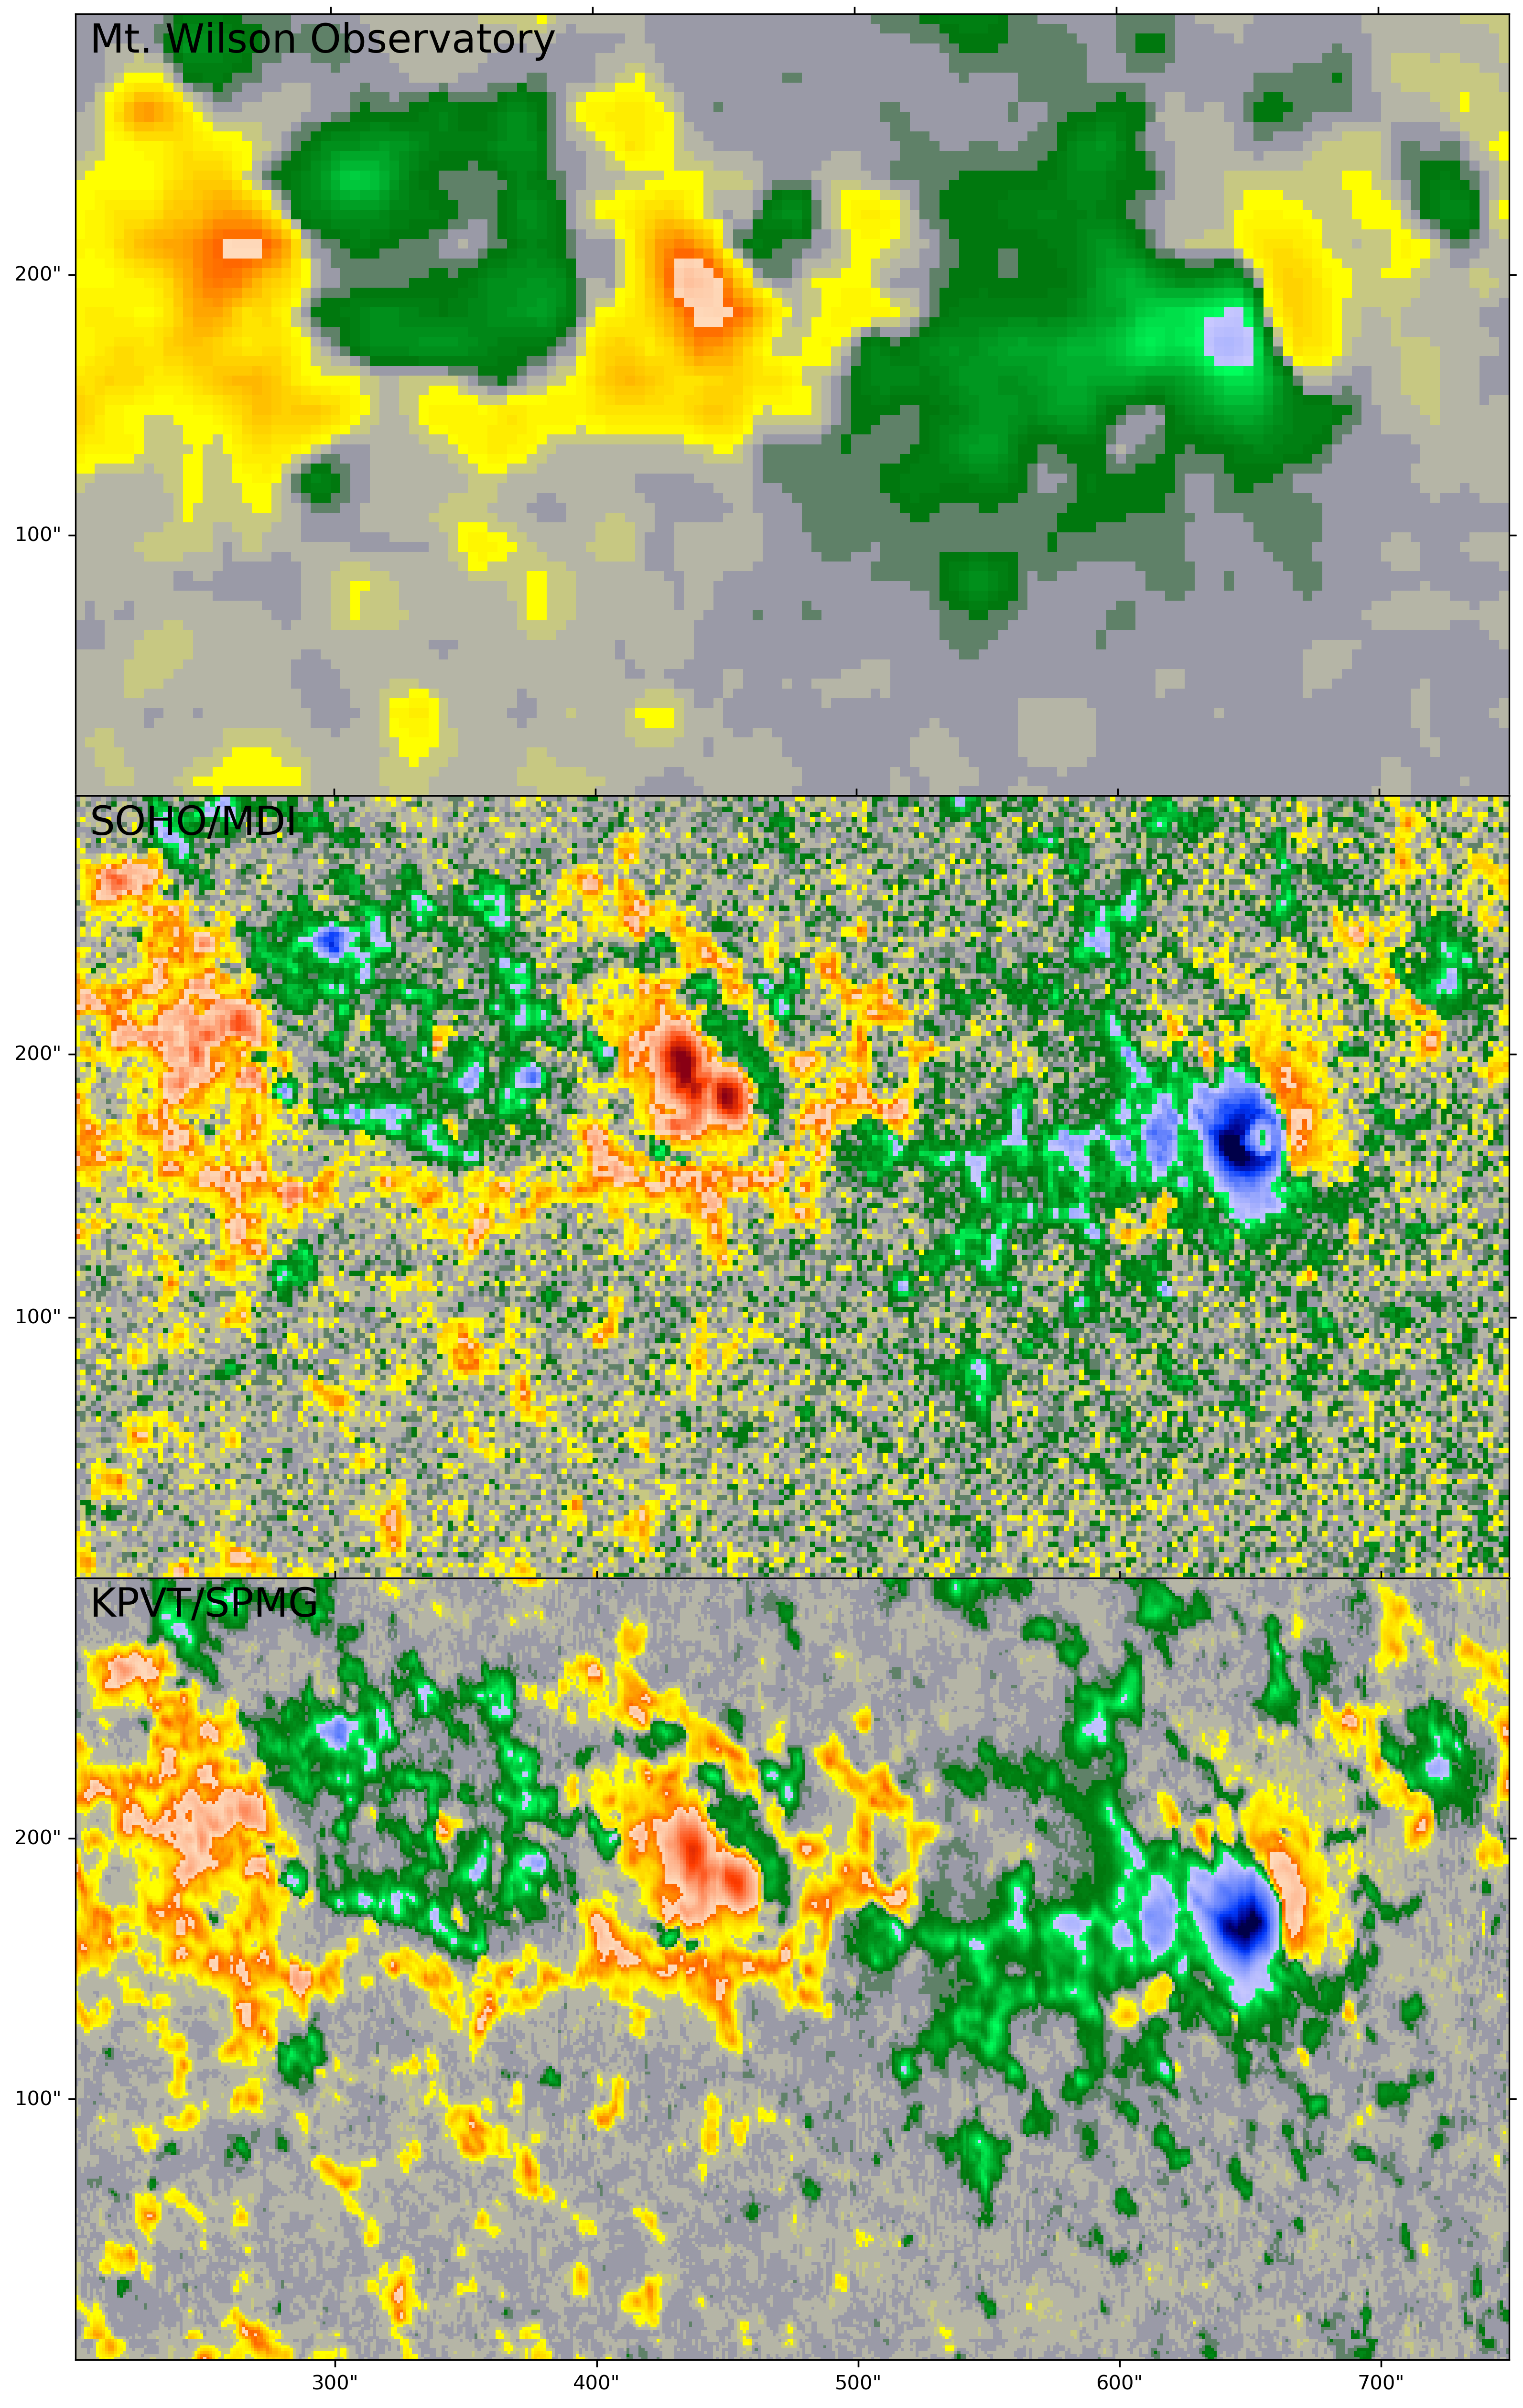

In [22]:
# Size definitions
dpi = 300
pxx = 3000   # Horizontal size of each panel
pxy = pxx*300/550   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 3     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)


## Add Mt. Wilson magnetogram
ax1 = fig.add_axes([ppadh, ppadv+2*ppxy, ppxx, ppxy], projection=MWFSmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MWFSmap.dimensions]) * u.pixel
hpc_coords = MWFSmap.pixel_to_world(x, y)
ax1.pcolormesh(x, y, MWFSmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax1.grid(False)

ax1.text(0.01, 0.99, 'Mt. Wilson Observatory', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax1.transAxes, fontsize = 20)


## Add SPMG magnetogram
ax2 = fig.add_axes([ppadh, ppadv+ppxy, ppxx, ppxy], projection=MDISmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in MDISmap.dimensions]) * u.pixel
hpc_coords = MDISmap.pixel_to_world(x, y)
mesh = ax2.pcolormesh(x, y, MDISmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax2.grid(False)

ax2.text(0.01, 0.99, 'SOHO/MDI', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax2.transAxes, fontsize = 20)


## Add SOT magnetogram
ax3 = fig.add_axes([ppadh, ppadv, ppxx, ppxy], projection=SPMGSmap)

x, y = np.meshgrid(*[np.arange(v.value) for v in SPMGSmap.dimensions]) * u.pixel
hpc_coords = SPMGSmap.pixel_to_world(x, y)
mesh = ax3.pcolormesh(x, y, SPMGSmap.data, vmin=vmin, vmax=vmax, cmap = current_cmap)
ax3.grid(False)

ax3.text(0.01, 0.99, 'KPVT/SPMG', horizontalalignment='left', verticalalignment='top', color = 'k', transform=ax3.transAxes, fontsize = 20);

Cut out using an arbitrary field of view.  This field of view is shown in the previous image as a black rectangle.